# Cancer Diagnosis using Machine Learning (scikit-learn)

In [1]:
# Imports
import pandas as pd
import numpy as np

In [2]:
# Remove User Warnings
from warnings import simplefilter
simplefilter(action='ignore', category=UserWarning)

### Getting the data ready

Import the cancer data.

In [3]:
cancer_data = pd.read_csv("../data/cancer_data.csv")
cancer_data.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check if there are any missing values.

In [4]:
# Get the sum of all missing values
cancer_data.isna().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Create the feature columns and the target columns.

In [5]:
# Create X (the feature columns)
X = cancer_data.drop("diagnosis", axis=1)

# Create y (the target column)
y = cancer_data["diagnosis"]

In [6]:
# Check the head of the features DataFrame
X.head()

,id,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Check the head and the value counts of the labels 
y.head(), y.value_counts()

(0    M
 1    M
 2    M
 3    M
 4    M
 Name: diagnosis, dtype: object,
 diagnosis
 B    357
 M    212
 Name: count, dtype: int64)

Split the data into training and test sets

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 31), (143, 31), (426,), (143,))

## Algorithm #1: Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create model instance
clf = RandomForestClassifier()

### Fitting the model to the data and using it to make a prediction

In [10]:
# Fit the model on the numerical data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = clf.predict(X=X_test)

### Evaluating the model

Evaluate the model on the training set.

In [12]:
train_acc = clf.score(X_train, y_train)
print(f"The model's accuracy on the training dataset is: {train_acc*100}%")

The model's accuracy on the training dataset is: 100.0%


Evaluate the model on the test set.

In [13]:
test_acc = clf.score(X_test, y_test)
print(f"The model's accuracy on the testing dataset is: {test_acc*100:.2f}%")

The model's accuracy on the testing dataset is: 97.20%


Create a classification report.

In [14]:
from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_preds)
print(clf_report)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        89
           M       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Area Under Receiver Operating Characteristic (ROC) Curve

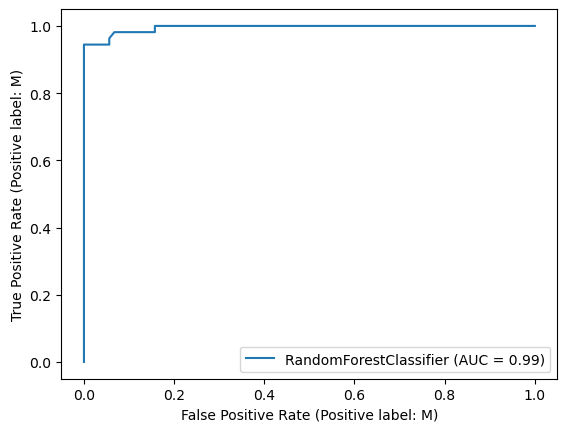

In [15]:
from sklearn.metrics import RocCurveDisplay
clf_roc_curve_display = RocCurveDisplay.from_estimator(estimator=clf, X=X_test, y=y_test)

## Algorithm #2: K-Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Create model instance
neigh = KNeighborsClassifier(n_neighbors=2)

### Fitting the model to the data and using it to make a prediction

In [66]:
# Fit the model on the numerical data
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [67]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = neigh.predict(X=X_test.values)

### Evaluating the model

Evaluate the model on the training set.

In [68]:
train_acc = neigh.score(X_train.values, y_train)
print(f"The model's accuracy on the training dataset is: {train_acc*100}%")

The model's accuracy on the training dataset is: 88.49765258215963%


Evaluate the model on the test set.

In [69]:
test_acc = neigh.score(X_test.values, y_test)
print(f"The model's accuracy on the testing dataset is: {test_acc*100:.2f}%")

The model's accuracy on the testing dataset is: 76.92%


Create a classification report.

In [70]:
neigh_report = classification_report(y_test, y_preds)
print(neigh_report)

              precision    recall  f1-score   support

           B       0.76      0.91      0.83        89
           M       0.78      0.54      0.64        54

    accuracy                           0.77       143
   macro avg       0.77      0.72      0.73       143
weighted avg       0.77      0.77      0.76       143



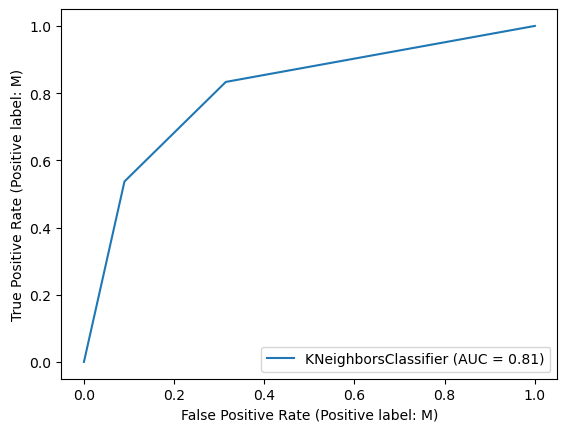

In [71]:
neigh_roc_curve_display = RocCurveDisplay.from_estimator(estimator=neigh, X=X_test.values, y=y_test)